# 1.1 Linear Binary Classification


### Overview
Linear Binary Classification refers to the task of classifying data into one of two possible classes, typically labeled as -1 and +1.

### Points and Features
- **Data Point**: 
  - Represented as $X \in \mathbb{R}^d$ which indicates the data point in a d-dimensional space.
- **Feature Vector**: 
  - Denoted as $f(X)$, it's the feature vector representation of X.
- **Feature Extractor**: 
  - A function, represented as $f$, that extracts the feature representation of $X$.

### Labels
- **Class Label**: 
  - Denoted as $y \in \{-1, +1\}$ which is the class label for the data point $X$.

### Classifier
- Uses a weight vector $w$ (often denoted in machine learning as $\theta$) to classify the data points based on their feature representation.
- **Decision Rule**: 
  - Given by $w^T f(X) \geq 0$. It determines the class of $X$ based on the dot product of the weight vector and the feature representation of $X$. If the result is greater than or equal to 0, the classifier predicts the positive class, otherwise, it predicts the negative class.

### Decision Boundary
- Represents the hyperplane where the classifier is uncertain (i.e., $w^T f(X) = 0$). 
- Data points on one side of this boundary belong to the +1 class, while those on the other side belong to the -1 class.

### Bias
- The equation with the bias is given by $w^T f(X) + b \geq 0$. 
- Introduces a bias term 'b' which shifts the decision boundary away from the origin.

### Feature Transformation
- The illustration shows a transformation where a constant 1 is added to every feature vector. This is a common trick used to incorporate the bias term directly into the weight vector, simplifying the decision rule.


### Why Add a Constant 1 to the Feature Vector?
When using linear classifiers like the one described in the image, the equation for the decision boundary is given by:

$$
w^T f(X)+b=0
$$

Here, $w$ is the weight vector, $f(X)$ is the feature vector of data point $X$, and $b$ is the bias. To avoid dealing with this bias term separately, a common trick is to include the bias in the weight vector itself. To achieve this:

Expand the weight vector $w$ by one element to include the bias, say $w^{\prime}=[w, b]$.
Expand the feature vector $f(X)$ by adding a constant 1 , say $f^{\prime}(X)=[f(X), 1]$.
Now, the dot product $w^{\prime T} f^{\prime}(X)$ will automatically include the bias term, simplifying the equation to:

$$
w^{\prime T} f^{\prime}(X)=0
$$

This makes computations and gradient updates (in algorithms like gradient descent) more straightforward.

In [1]:
import numpy as np

def transform_features(features):
    # Append a constant 1 to each feature vector
    transformed = np.hstack([features, np.ones((features.shape[0], 1))])
    return transformed

# Sample feature vectors
features = np.array([
    [3, -1, 2],
    [2, 0, 5],
    [1, 1, 1]
])

transformed_features = transform_features(features)
print(transformed_features)


[[ 3. -1.  2.  1.]
 [ 2.  0.  5.  1.]
 [ 1.  1.  1.  1.]]


# 1.2 Sentiment Analysis and Feature Extraction

## Overview
Sentiment Analysis is a sub-field of natural language processing (NLP) focused on determining the sentiment (e.g., positive, negative, neutral) expressed in a piece of text.

## Basic Feature Extraction

1. From a given text, **features** are extracted using a function $f(X)$.
2. These features, combined with their labels, constitute a dataset used to train a classifier.

## Feature Extraction Methods

### Bag-of-Words (BoW)
- Each word in the text is treated as a unique feature. Given a vocabulary (e.g., 10,000 words), a text is represented as a vector. Each element of this vector indicates the presence (or count) of a word in the text.
- Example: 
  - For the text "the movie was great", the vector representation might be `[1, 0, 0, ..., 1, 1, 1]`, indicating the presence of the words "the", "movie", "was", and "great".

- Pros:
    - Simple and easy to understand.
    - Effective for many basic tasks, especially when combined with other techniques like TF-IDF weighting.
- Cons:
    - Ignores the order of words, thereby losing context and semantics.
    - Can result in large vectors if the vocabulary is large, leading to high dimensionality.
    
### Bag-of-ngrams
- Instead of individual words, sequences of `n` consecutive words (ngrams) are treated as features.
- Example: 
  - 2-grams for "the movie was great" include "the movie", "movie was", and "was great".

- Pros:
    - Captures some context and semantics by considering word sequences.
    - Can detect phrases and idioms that are missed by the BoW model.
- Cons:
    - The dimensionality increases rapidly with the increase in n and vocabulary size.
    - Does not consider the importance or weight of words in the context of the entire corpus.

### TF-IDF (Term Frequency-Inverse Document Frequency)
- Weighs terms based on their importance in the document relative to the entire corpus.
- Considers both local (TF - how often a term appears in a specific document) and global (IDF - how common or rare a term is across all documents) statistics.
- **TF**: Represents the count of a term in a document. 
  - Formula: $tf(t, d)$ = Number of times term $t$ appears in document $d$.
- **IDF**: The inverse of the fraction of documents that contain the term. It diminishes the weight of terms that occur frequently and increases the weight of terms that occur rarely.
  - Formula: $\ \text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t, D) \$
  
  Where:
  
  $\text{TF}(t, d) = Term Frequency = \frac{\text{Number of times term t\) appears in document \(d\)}}{\text{Total number of terms in document \(d\)}}$
  
  $\text{IDF}(t, D) = Inverse Document Frequency = \log\left(\frac{\text{Total number of documents in corpus \(D\)}}{\text{Number of documents with term \(t\) in them}}\right)$

### Compare BOW, Ngrams and TF-IDF
BoW is a foundational method and is the simplest form of text representation.

Bag-of-ngrams builds on BoW by capturing some local context, improving the quality of features at the cost of higher dimensionality.

TF-IDF is a weighing scheme that can be combined with both BoW and Bag-of-ngrams to prioritize words that are uniquely informative about a document in the context of a larger corpus.

## Preprocessing
Before the extraction of features, it's common to preprocess texts to enhance feature quality and reduce dimensionality:

1. **Tokenization**: Splitting the text into smaller chunks, usually words or tokens. 
  - Example: "wasn't" can be split into "was" and "n't".
2. **Stopword Removal**: Omitting words that are frequent across many documents but don't carry significant sentiment value (e.g., "the", "of", "a").
3. **Casing**: Translating all characters in the text to lowercase to ensure consistency.
4. **Handling Unknown Words**: Replacing words that aren't in the predefined vocabulary with a special token like "UNK" (Unknown).
5. **Indexing**: Associating each word or n-gram with a unique integer ID.


In [9]:
#BOW Example
from sklearn.feature_extraction.text import CountVectorizer

# Sample texts
texts = [
    "the movie was great",
    "the film was awful",
    "I'll never watch that movie again",
    "I loved the film"
]

# Create a Bag-of-Words vectorizer
vectorizer = CountVectorizer()

# Apply the vectorizer on the sample texts
features = vectorizer.fit_transform(texts)

# Convert the feature matrix to an array and get feature names
feature_array = features.toarray()
feature_names = vectorizer.get_feature_names_out()

# Display the features
for i, text in enumerate(texts):
    print(f"Text: {text}")
    print("Feature Vector:", feature_array[i])
    print("Mapped Words:", {feature_names[j]: feature_array[i][j] for j in range(len(feature_names)) if feature_array[i][j] > 0})
    print("Not Mapped Words:", {feature_names[j]: feature_array[i][j] for j in range(len(feature_names)) if feature_array[i][j] == 0})
    print("------------")

Text: the movie was great
Feature Vector: [0 0 0 1 0 0 1 0 0 1 1 0]
Mapped Words: {'great': 1, 'movie': 1, 'the': 1, 'was': 1}
Not Mapped Words: {'again': 0, 'awful': 0, 'film': 0, 'll': 0, 'loved': 0, 'never': 0, 'that': 0, 'watch': 0}
------------
Text: the film was awful
Feature Vector: [0 1 1 0 0 0 0 0 0 1 1 0]
Mapped Words: {'awful': 1, 'film': 1, 'the': 1, 'was': 1}
Not Mapped Words: {'again': 0, 'great': 0, 'll': 0, 'loved': 0, 'movie': 0, 'never': 0, 'that': 0, 'watch': 0}
------------
Text: I'll never watch that movie again
Feature Vector: [1 0 0 0 1 0 1 1 1 0 0 1]
Mapped Words: {'again': 1, 'll': 1, 'movie': 1, 'never': 1, 'that': 1, 'watch': 1}
Not Mapped Words: {'awful': 0, 'film': 0, 'great': 0, 'loved': 0, 'the': 0, 'was': 0}
------------
Text: I loved the film
Feature Vector: [0 0 1 0 0 1 0 0 0 1 0 0]
Mapped Words: {'film': 1, 'loved': 1, 'the': 1}
Not Mapped Words: {'again': 0, 'awful': 0, 'great': 0, 'll': 0, 'movie': 0, 'never': 0, 'that': 0, 'was': 0, 'watch': 0}
---

In [10]:
# 2. Bag-of-2-grams
from sklearn.feature_extraction.text import CountVectorizer

# Sample sentences
sentences = [
    "the movie was great",
    "I loved the film",
    "the acting was terrible"
]

# Create a CountVectorizer with bigram configuration
vectorizer = CountVectorizer(ngram_range=(2, 2))

# Fit and transform the sentences to get bigram features
bigram_features = vectorizer.fit_transform(sentences)

# Convert the features to an array and get feature names (bigrams)
bigram_array = bigram_features.toarray()
feature_names = vectorizer.get_feature_names_out()

# Print the bigrams and their counts for each sentence
for i, sentence in enumerate(sentences):
    print(f"Sentence: {sentence}")
    for j, bigram in enumerate(feature_names):
        print(f"  Bigram: {bigram}, Count: {bigram_array[i][j]}")
    print()


Sentence: the movie was great
  Bigram: acting was, Count: 0
  Bigram: loved the, Count: 0
  Bigram: movie was, Count: 1
  Bigram: the acting, Count: 0
  Bigram: the film, Count: 0
  Bigram: the movie, Count: 1
  Bigram: was great, Count: 1
  Bigram: was terrible, Count: 0

Sentence: I loved the film
  Bigram: acting was, Count: 0
  Bigram: loved the, Count: 1
  Bigram: movie was, Count: 0
  Bigram: the acting, Count: 0
  Bigram: the film, Count: 1
  Bigram: the movie, Count: 0
  Bigram: was great, Count: 0
  Bigram: was terrible, Count: 0

Sentence: the acting was terrible
  Bigram: acting was, Count: 1
  Bigram: loved the, Count: 0
  Bigram: movie was, Count: 0
  Bigram: the acting, Count: 1
  Bigram: the film, Count: 0
  Bigram: the movie, Count: 0
  Bigram: was great, Count: 0
  Bigram: was terrible, Count: 1



In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample texts
documents = [
    "I love watching movies",
    "Movies are great and I love them",
    "Do you love watching movies too?"
]

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Display the TF-IDF values
for doc_num, tfidf_vector in enumerate(tfidf_matrix):
    print(f"Document {doc_num + 1}")
    for word, index in tfidf_vectorizer.vocabulary_.items():
        print(f"{word}: {tfidf_vector[0, index]:.4f}")
    print("\n")


Document 1
love: 0.5228
watching: 0.6733
movies: 0.5228
are: 0.0000
great: 0.0000
and: 0.0000
them: 0.0000
do: 0.0000
you: 0.0000
too: 0.0000


Document 2
love: 0.2725
watching: 0.0000
movies: 0.2725
are: 0.4614
great: 0.4614
and: 0.4614
them: 0.4614
do: 0.0000
you: 0.0000
too: 0.0000


Document 3
love: 0.2856
watching: 0.3678
movies: 0.2856
are: 0.0000
great: 0.0000
and: 0.0000
them: 0.0000
do: 0.4836
you: 0.4836
too: 0.4836




# 2.1 Basic Machine Learning: Gradient Descent

## Introduction
In machine learning, we often aim to optimize parameters, which are denoted as $w$. The optimization process uses labeled data consisting of input-output pairs. Each pair can be represented as $(x^{(i)}, y^{(i)})$, where $i$ ranges from 1 to $D$, and $D$ represents the total number of data points.


## Features and Objective
- If we assume there are 10,000 features, our weight vector $w$ can be considered to belong to $\mathbb{R}^{10,000}$.
- The optimization problem involves searching for an optimal $w$ by either minimizing or maximizing a training objective. This objective typically represents the difference between our model's predictions and the actual data.
- The objective can be formally represented as:
  
  $$
  \text{Objective: } \sum_{i=1}^{D} \text{loss}(x^{(i)}, y^{(i)}, w)
  $$
  
  This equation sums up the loss over all data points.

## Formula

Gradient Descent is an optimization algorithm used to minimize a function iteratively. It's widely used in training machine learning models. The general formula for the gradient descent update rule is:

$$ w_{\text{new}} = w_{\text{old}} - \alpha \nabla f(w_{\text{old}}) $$

Where:
- $w_{\text{old}} $ is the current value of the parameter.
- $w_{\text{new}} $ is the updated value of the parameter.
- $\alpha $ is the learning rate, a hyperparameter that determines the step size at each iteration while moving towards a minimum of the cost function.
- $\nabla f(w_{\text{old}}) $ is the gradient of the function $ f $ with respect to $ w $ evaluated at $w_{\text{old}}$. It represents the direction of the steepest increase of the function. 

By subtracting the gradient from the current value, we move towards the direction of steepest descent (i.e., minimizing the function).

For functions that are a function of multiple parameters (multivariate functions), $w $ and $\nabla f(w)$ become vectors, but the update rule remains conceptually the same for each parameter.

The process is iterative: we keep updating the parameter $ w $ until the algorithm converges (i.e., until the value of $ w $ stops changing significantly) or until a predetermined number of iterations is reached.


## Stochastic Gradient Descent (SGD)
Gradient Descent is a method used to iteratively adjust the parameters $w$ to minimize a given loss function. The adjustment direction is determined by the gradient of the loss concerning $w$. 

Stochastic Gradient Descent (SGD) is a variant where, instead of using the entire dataset to compute the gradient, only a single or a small batch of samples is used in each iteration, making it faster and more suitable for large datasets.

### Pseudocode for SGD:
for t up to num_epochs:

    for i up to D:
        sample j from [1, D]
        w = w - α * ∂/∂w loss(x^{(j)}, y^{(j)}, w)

Here, $\alpha$ denotes the step size or learning rate. It determines the extent to which we adjust $w$ in the opposite direction to the gradient.

### Key Point:
The gradient of the loss with respect to $w$ indicates the direction where $w$ leads to a higher loss. This is why we move in the opposite direction by subtracting the gradient from $w$ to achieve a lower loss.



In [12]:
# Gradient Descent to Minimize w^2

def f(w):
    return w**2

def gradient(w):
    return 2*w

# Gradient Descent
def gradient_descent(learning_rate=0.1, num_iterations=100, start_value=5):
    w = start_value
    w_history = [w]
    for i in range(num_iterations):
        w = w - learning_rate * gradient(w)
        w_history.append(w)
    return w, w_history

# Run Gradient Descent
final_w, w_history = gradient_descent(learning_rate=0.1, num_iterations=50, start_value=5)

print("Final Value of w:", final_w)
print("Path of w during gradient descent:", w_history)


Final Value of w: 7.136238463529802e-05
Path of w during gradient descent: [5, 4.0, 3.2, 2.56, 2.048, 1.6384, 1.31072, 1.0485760000000002, 0.8388608000000002, 0.6710886400000001, 0.5368709120000001, 0.4294967296000001, 0.3435973836800001, 0.27487790694400005, 0.21990232555520003, 0.17592186044416003, 0.140737488355328, 0.11258999068426241, 0.09007199254740993, 0.07205759403792794, 0.057646075230342354, 0.04611686018427388, 0.03689348814741911, 0.029514790517935284, 0.02361183241434823, 0.018889465931478583, 0.015111572745182867, 0.012089258196146294, 0.009671406556917036, 0.007737125245533628, 0.006189700196426903, 0.004951760157141522, 0.003961408125713218, 0.0031691265005705745, 0.00253530120045646, 0.0020282409603651678, 0.0016225927682921343, 0.0012980742146337075, 0.001038459371706966, 0.0008307674973655728, 0.0006646139978924582, 0.0005316911983139665, 0.00042535295865117324, 0.0003402823669209386, 0.00027222589353675085, 0.0002177807148294007, 0.00017422457186352054, 0.000139379

# 2.2 Basic Machine Learning: Perceptron

The perceptron is a simple linear binary classifier used in supervised learning. It is a type of linear classifier, specifically a type of linear binary classifier.

Perceptron is a single layer neural network and a multi-layer perceptron is called Neural Networks.

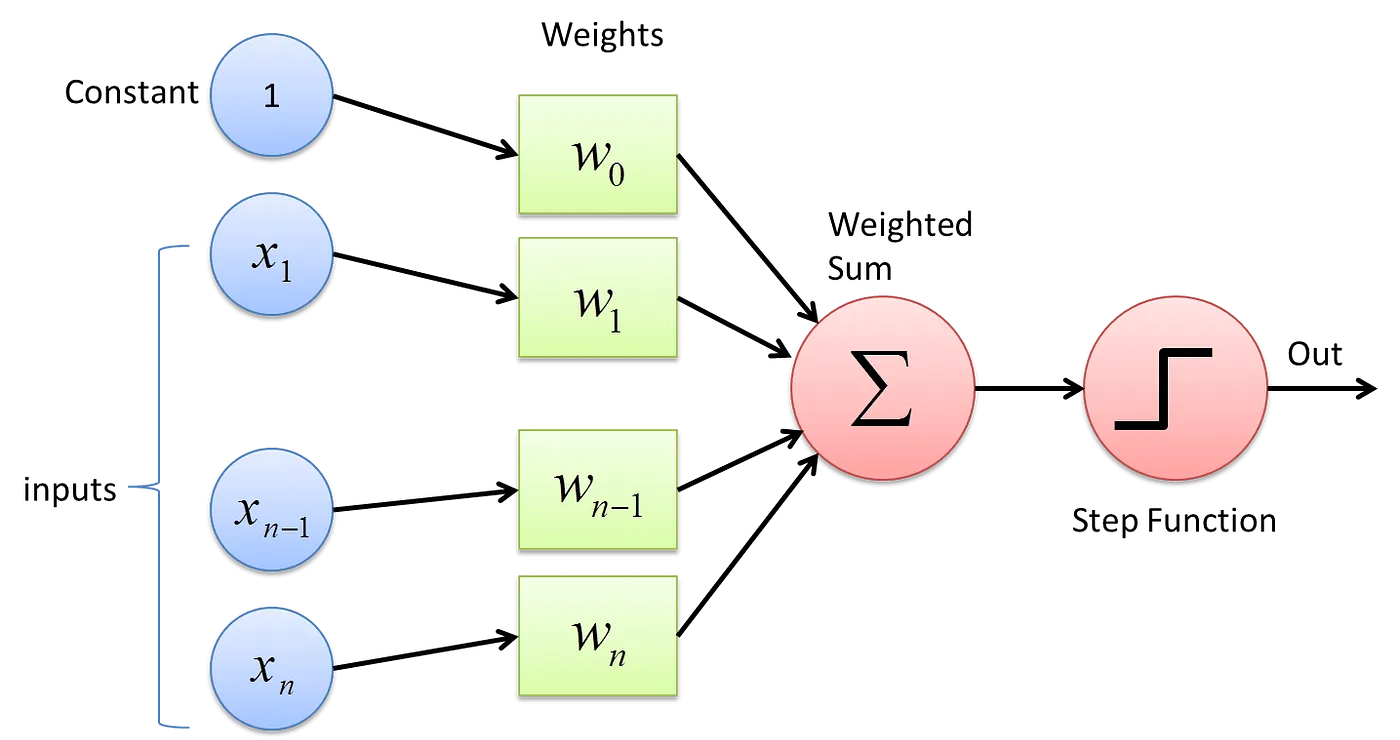

### Definition:

The perceptron uses the following decision rule:

$$ 
w^T f(x) \geq 0 
$$

Where:

- $ y $ belongs to the set \{-1, +1\}.
- $ w $ is the weight vector associated with the features.

Why do we need Weights and Bias?
- Weights shows the strength of the particular node.
- A bias value allows you to shift the activation function curve up or down.

Why do we need Activation Function?
- In short, the activation functions are used to map the input between the required values like (0, 1) or (-1, 1).

### Peceptron vs. Logistic Regression:
Logistic regression and the perceptron algorithm are very similar to each other. It's common to think of logistic regression as a kind of perceptron algorithm on steroids, in that a logistic model can predict probabilities while a perceptron can only predict yes or no.

### Perceptron Training Algorithm:

To train the perceptron, we iteratively update the weights based on the misclassified examples:


for each epoch:

    for each data point (i) in the dataset (D):
        y_pred = 1 if \( w^T f(x^{(i)}) > 0 \) else -1
        if y_pred equals \( y^{(i)} \):
            Do nothing (i.e., no update is made)
        else:
            if \( y^{(i)} \) is +1:
                w = w + \alpha f(x^{(i)})
            else:
                w = w - \alpha f(x^{(i)})


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Dummy dataset
sentences = ["movie good", "movie bad", "not good"]
labels = [1, -1, -1]  # 1 for positive, -1 for negative

# Simple Bag-of-Words Feature Extraction
vocab = ["movie", "good", "bad", "not"]
features = []
for sentence in sentences:
    feature = [1 if word in sentence.split() else 0 for word in vocab]
    features.append(feature)
X = np.array(features)
y = np.array(labels)

# Perceptron
class Perceptron:
    def __init__(self, learning_rate=1):
        self.learning_rate = learning_rate
        self.weights = np.zeros(len(vocab))
    
    def predict(self, x):
        return np.sign(np.dot(self.weights, x))

    def train(self, X, y, epochs=10):
        for epoch in range(epochs):
            for xi, yi in zip(X, y):
                prediction = self.predict(xi)
                if prediction != yi:
                    self.weights += self.learning_rate * yi * xi

# Train our perceptron
clf = Perceptron()
clf.train(X, y, epochs=5)

# Testing
test_sentences = ["movie really good", "movie was not bad", "bad movie"]
test_features = []
for sentence in test_sentences:
    feature = [1 if word in sentence.split() else 0 for word in vocab]
    test_features.append(feature)

print("Predictions:")
for sentence, feature in zip(test_sentences, test_features):
    print(f"'{sentence}':", "Positive" if clf.predict(feature) == 1 else "Negative")



Bad key text.latex.preview in file /Users/victorhu/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/victorhu/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/victorhu/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is save

Predictions:
'movie really good': Positive
'movie was not bad': Negative
'bad movie': Negative


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Dummy dataset
sentences = ["movie good", "movie bad", "not good"]
labels = [1, -1, -1]  # 1 for positive, -1 for negative

# Extracting features (Bag-of-Words + Bigrams)
def extract_features(sentence):
    words = sentence.split()
    bigrams = [" ".join(words[i:i+2]) for i in range(len(words) - 1)]
    features = words + bigrams
    return features

vocab = list(set(word for sentence in sentences for word in extract_features(sentence)))
features = []
for sentence in sentences:
    feature = [1 if token in extract_features(sentence) else 0 for token in vocab]
    features.append(feature)

X = np.array(features)
y = np.array(labels)

# Perceptron
class Perceptron:
    def __init__(self, learning_rate=1):
        self.learning_rate = learning_rate
        self.weights = np.zeros(len(vocab))
    
    def predict(self, x):
        return np.sign(np.dot(self.weights, x))

    def train(self, X, y, epochs=10):
        for epoch in range(epochs):
            for xi, yi in zip(X, y):
                prediction = self.predict(xi)
                if prediction != yi:
                    self.weights += self.learning_rate * yi * xi

# Train our perceptron
clf = Perceptron()
clf.train(X, y, epochs=5)

# Testing
test_sentences = ["movie really good", "movie was not bad", "bad movie", "not bad"]
test_features = []
for sentence in test_sentences:
    feature = [1 if token in extract_features(sentence) else 0 for token in vocab]
    test_features.append(feature)

print("Predictions:")
for sentence, feature in zip(test_sentences, test_features):
    print(f"'{sentence}':", "Positive" if clf.predict(feature) == 1 else "Negative")


Predictions:
'movie really good': Negative
'movie was not bad': Negative
'bad movie': Negative
'not bad': Negative


## Perceptron as Minimizing Loss

The perceptron algorithm can be thought of as an optimization procedure to minimize a specific loss function.

### Loss Function

The loss function for the perceptron is given as:

$
\text{loss}(x^{(i)}, y^{(i)}, w) = 
\begin{cases} 
0 & \text{if } w^T f(x^{(i)}) y^{(i)} \geq 0 \\
-w^T f(x^{(i)}) y^{(i)} & \text{else}
\end{cases}
$

Here:

- $w$ is the weight vector.
- $f(x^{(i)})$ is the feature representation of the input.
- $y^{(i)}$ is the true label of the input.

### Sanity Check:

1. **Zero Loss**: If the loss is zero, it means the current example is correctly classified, and no weight update is needed.
2. **Gradient of the Loss**: The gradient is essential for updating the weights. The gradient of the loss with respect to $w$ is:

$
\frac{\partial \text{loss}}{\partial w} = 
\begin{cases} 
0 & \text{if } w^T f(x^{(i)}) > 0 \\
-f(x^{(i)}) & \text{else}
\end{cases}
$



Suppose we have three bag-of-words features [good, bad, not] and the examples

good +

not good -

bad -

Use the decision rule wTf(x) > 0, so a score of zero gets assigned the negative class.

What is the resulting weights after executing the perceptron algorithm until convergence?

In [1]:
# Initialize weights
# Features: [good, bad, not]

w = [0, 0, 0]
examples = [
    ([1, 0, 0], 1),  # "good" labeled as +
    ([1, 0, 1], -1), # "not good" labeled as -
    ([0, 1, 0], -1)  # "bad" labeled as -
]

def predict(features, weights):
    return 1 if sum([f*w for f, w in zip(features, weights)]) > 0 else -1

converged = False

while not converged:
    converged = True
    for features, label in examples:
        pred = predict(features, w)
        if pred != label:
            converged = False
            # Update weights
            for i in range(len(w)):
                w[i] += label * features[i]
        print(f"Example: {features}, Label: {label}, Prediction: {pred}, Weights after update: {w}")

print("Final Weights:", w)

Example: [1, 0, 0], Label: 1, Prediction: -1, Weights after update: [1, 0, 0]
Example: [1, 0, 1], Label: -1, Prediction: 1, Weights after update: [0, 0, -1]
Example: [0, 1, 0], Label: -1, Prediction: -1, Weights after update: [0, 0, -1]
Example: [1, 0, 0], Label: 1, Prediction: -1, Weights after update: [1, 0, -1]
Example: [1, 0, 1], Label: -1, Prediction: -1, Weights after update: [1, 0, -1]
Example: [0, 1, 0], Label: -1, Prediction: -1, Weights after update: [1, 0, -1]
Example: [1, 0, 0], Label: 1, Prediction: 1, Weights after update: [1, 0, -1]
Example: [1, 0, 1], Label: -1, Prediction: -1, Weights after update: [1, 0, -1]
Example: [0, 1, 0], Label: -1, Prediction: -1, Weights after update: [1, 0, -1]
Final Weights: [1, 0, -1]


Now suppose the data is:

good +

bad -

not good -

not bad +

What is the weight vector after one epoch of the perceptron, iterating through the data in the order above?

In [ ]:
# Define the data
features = [["good"], ["bad"], ["not", "good"], ["not", "bad"]]
labels = [1, -1, -1, 1]  # +1 for positive sentiment, -1 for negative sentiment

# Define the feature-to-index mapping
feature_to_index = {"good": 0, "bad": 1, "not": 2}

# Initialize the weights
weights = [0, 0, 0]

def dot_product(features, weights):
    return sum(weights[feature_to_index[feature]] for feature in features)

for i in range(len(features)):
    # Predict using the current weights
    prediction = dot_product(features[i], weights)
    
    # If prediction is wrong, update weights
    if (prediction > 0 and labels[i] == -1) or (prediction <= 0 and labels[i] == 1):
        for feature in features[i]:
            weights[feature_to_index[feature]] += labels[i]
    
    # Print the weights after each step
    print("After processing example", i+1, "weights are:", weights)

print("\nFinal weights after one epoch:", weights)

# 2.3 Logistic Regression

Logistic regression is a discriminative probabilistic model. Unlike generative models, which model the joint probability distribution $P(X, y)$, logistic regression models the conditional distribution $P(y|X)$.

The logistic function (also known as the sigmoid function) is given by:
$$ P(y=+1|X) = \frac{e^{\mathbf{w}^T f(X)}}{1 + e^{\mathbf{w}^T f(X)}} $$
$$ P(y=-1|X) = \frac{1}{1 + e^{\mathbf{w}^T f(X)}} $$

Here, $f(X)$ represents the feature vector and $\mathbf{w}$ is the weight vector. The graph on the right showcases the sigmoid function.

### Decision Boundary
We can set a threshold to make a binary decision:
$ \text{Return } +1 \text{ if } P(y=+1|X) > 0.5 $
which is equivalent to:
$$ \mathbf{w}^T f(X) > 0 $$

---

### Training Logistic Regression

For training, we use the concept of maximum likelihood. For a dataset $(X^{(i)}, y^{(i)})_{i=1}^D$, we want to maximize the likelihood:
$$ \prod_{i=1}^{D} P(y^{(i)}|X^{(i)}) $$

This is equivalent to maximizing the log likelihood:
$$ \max_{\mathbf{w}} \sum_{i=1}^{D} \log P(y^{(i)}|X^{(i)}) $$
or minimizing the negative log likelihood (NLL):
$$ \min_{\mathbf{w}} \sum_{i=1}^{D} -\log P(y^{(i)}|X^{(i)}) $$


---

### Logistic Regression Gradients

To update the weights during training, we need to compute the gradient of the loss with respect to the weights:
$$ \frac{\partial \text{loss}}{\partial \mathbf{w}} $$
Using the chain rule, this can be derived as:
$$ \frac{\partial \text{loss}}{\partial \mathbf{w}} = -f(X) + \frac{1}{1 + e^{-\mathbf{w}^T f(X)}} \cdot f(X) $$
This can be further simplified to:
$$ f(X) \left[ -1 + \frac{e^{\mathbf{w}^T f(X)}}{1 + e^{\mathbf{w}^T f(X)}} \right] = f(X) \left[ P(y=+1|X) - 1 \right] $$

The update rule can be written as:
$$ \mathbf{w} \leftarrow \mathbf{w} + \alpha f(X) \left[ 1 - P(y=+1|X) \right] $$

For $P(y=+1|X) \approx 1$, there's no update. For $P(y=+1|X) \approx 0$, the update is similar to the perceptron update.

The graph at the end represents the loss for logistic regression (LR) and perceptron. Here, $z = \mathbf{w}^T f(X)$ and NLL is given by:
$$ \text{NLL} = \log(1 + e^z) - z $$

---



# 2.4 Optimization Basics

The primary goal in training machine learning models is to minimize a loss function by adjusting the model's parameters. This can be represented as:

$$
\min_w \sum_{i=1}^{D} L(x^{(i)}, y^{(i)}, w)
$$

- **Objective**: Find $ w $ to minimize the aggregate loss over the training data.
- $ L(x^{(i)}, y^{(i)}, w) $ represents the loss for the $i^{th}$ training example, given model weights $ w $.

### Stochastic Gradient Descent (SGD)

One popular optimization method is Stochastic Gradient Descent. In each iteration, it updates the weights using the gradient of the loss with respect to the weights, based on a randomly chosen example.

Update rule:
$$
w \leftarrow w - \alpha \nabla_w L(i; w)
$$

where $ \alpha $ is the step size or learning rate.
As an example, consider the loss function $ L(i; w) = w^2 $. Depending on the choice of $ \alpha $, the weight updates can differ.

---

## Choosing Step Size

The step size, or learning rate, is crucial in optimization algorithms like SGD. It determines the magnitude of each weight update:

- **Options**:
  - **Trial and Error**: Experiment with values like $ 1e^0, 1e^{-1}, 1e^{-2} $ etc.
  - **Adaptive Scheduling**: Decrease the step size over time, using a fixed schedule or when performance plateaus on a validation set.
  
### Advanced Optimization Methods

- **Newton's Method**: Uses the second derivative (Hessian) to guide the optimization.
  
  Update rule:
  $$
  w \leftarrow w - H^{-1} \nabla_w L
  $$
  
  where $ H $ is the Hessian matrix. This method can converge faster than SGD but can be computationally intensive for large models.

- **Adaptive Methods**: Algorithms like Adagrad, Adadelta, and Adam adjust the learning rate based on historical gradient information. They are particularly useful for problems with sparse gradients.

- **Regularization**: Techniques used to prevent overfitting by adding a penalty to the loss function for large weight values.
